In [11]:
from datetime import datetime, timedelta

import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_users = pd.read_csv('../data/random-users.csv')

In [9]:
def analyze_signups(df, date_column='signup_date'):
    """
    Analyze user signup patterns from a DataFrame containing signup dates
    
    Parameters:
    df (pandas.DataFrame): DataFrame with signup date column
    date_column (str): Name of the column containing signup dates
    
    Returns:
    dict: Dictionary containing various signup metrics and analyses
    """
    # Ensure date column is datetime
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Basic metrics
    analysis = {
        'total_signups': len(df),
        'first_signup': df[date_column].min(),
        'last_signup': df[date_column].max(),
        'timespan_days': (df[date_column].max() - df[date_column].min()).days
    }
    
    # Daily signups
    daily_signups = df.groupby(df[date_column].dt.date).size()
    analysis['daily_metrics'] = {
        'avg_daily_signups': daily_signups.mean(),
        'max_daily_signups': daily_signups.max(),
        'min_daily_signups': daily_signups.min(),
        'best_day': daily_signups.idxmax(),
        'worst_day': daily_signups.idxmin()
    }
    
    # Monthly signups
    monthly_signups = df.groupby([df[date_column].dt.year, df[date_column].dt.month]).size()
    analysis['monthly_metrics'] = {
        'avg_monthly_signups': monthly_signups.mean(),
        'max_monthly_signups': monthly_signups.max(),
        'min_monthly_signups': monthly_signups.min()
    }
    
    # Day of week analysis
    dow_signups = df.groupby(df[date_column].dt.day_name()).size()
    analysis['dow_distribution'] = dow_signups
    
    return analysis

def plot_signup_trends(df, date_column='signup_date'):
    """
    Create visualizations for signup trends
    
    Parameters:
    df (pandas.DataFrame): DataFrame with signup date column
    date_column (str): Name of the column containing signup dates
    """
    # Set style
    # plt.style.use('seaborn')
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Daily signups trend
    daily_signups = df.groupby(df[date_column].dt.date).size()
    daily_signups.plot(ax=axes[0,0])
    axes[0,0].set_title('Daily Signups Over Time')
    axes[0,0].set_xlabel('Date')
    axes[0,0].set_ylabel('Number of Signups')
    
    # 2. Monthly signups
    monthly_signups = df.groupby([df[date_column].dt.year, df[date_column].dt.month]).size()
    monthly_signups.plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Monthly Signups')
    axes[0,1].set_xlabel('Year-Month')
    axes[0,1].set_ylabel('Number of Signups')
    
    # 3. Day of week distribution
    dow_signups = df.groupby(df[date_column].dt.day_name()).size()
    dow_signups.plot(kind='bar', ax=axes[1,0])
    axes[1,0].set_title('Signups by Day of Week')
    axes[1,0].set_xlabel('Day of Week')
    axes[1,0].set_ylabel('Number of Signups')
    
    # 4. Hour of day distribution
    hour_signups = df.groupby(df[date_column].dt.hour).size()
    hour_signups.plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('Signups by Hour of Day')
    axes[1,1].set_xlabel('Hour')
    axes[1,1].set_ylabel('Number of Signups')
    
    plt.tight_layout()
    return fig

Total signups: 2000
Average daily signups: 22.22222222222222


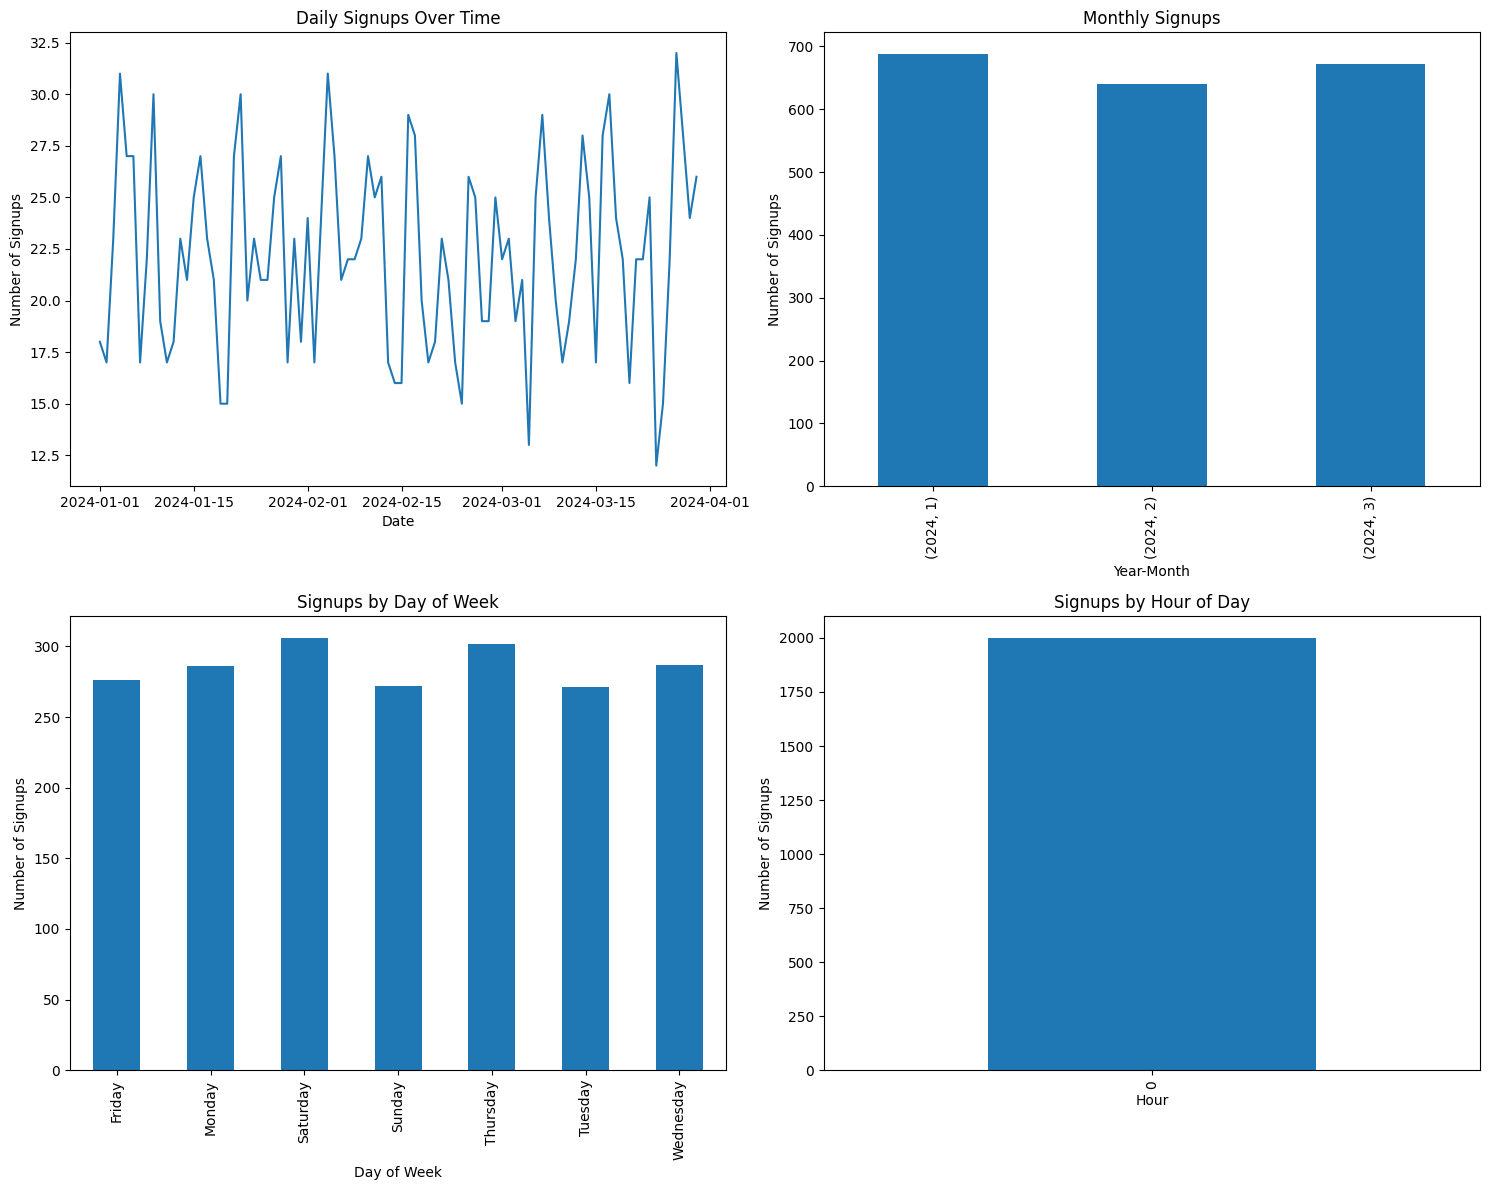

In [10]:
analysis_results = analyze_signups(df_users, date_column='signup_date')
print("Total signups:", analysis_results['total_signups'])
print("Average daily signups:", analysis_results['daily_metrics']['avg_daily_signups'])

# Create visualizations
plot_signup_trends(df_users, date_column='signup_date')
plt.show()

In [4]:
df_users.head()

,user_id,signup_date,lead_source,organization_type,organization_size,expected_student_count,role_title,primary_use_case,required_features,current_solution,decision_timeframe,converted,conversion_date
0,USR001,2024-03-15,Product Review Site,Individual Course Creator,51-200,100-500,Department Head,Compliance Training,"Course Creation, Certification Management, Mob...",Competitor Product,3-6 months,False,NaN
1,USR002,2024-01-08,Social Media,K-12 School,1000+,1000-5000,HR Manager,Compliance Training,"Assessment Tools, Course Creation, Virtual Cla...",Custom Built Solution,Within 1 month,False,NaN
2,USR003,2024-03-15,Direct Traffic,Corporate Training,1-50,5000+,HR Manager,Professional Certification,"Content Library, Compliance Training, Integrat...",Custom Built Solution,Within 1 month,False,NaN
3,USR004,2024-02-07,Education Conference,Certification Body,201-500,1000-5000,HR Manager,Employee Training,"Course Creation, Mobile Learning",Competitor Product,3-6 months,False,NaN
4,USR005,2024-03-14,Google Search,Corporate Training,201-500,<100,Training Manager,Academic Courses,"Integration Capabilities, Mobile Learning, Cer...",Custom Built Solution,6+ months,False,NaN


In [12]:
def prepare_lead_scoring_data(df, train_end_date='2023-06-30', val_end_date='2023-09-30'):
    df = df.copy()
    
    # Convert dates to datetime
    df['signup_date'] = pd.to_datetime(df['signup_date'])
    df['conversion_date'] = pd.to_datetime(df['conversion_date'])

    # Create time-based splits
    train_mask = df['signup_date'] < train_end_date
    val_mask = (df['signup_date'] >= train_end_date) & (df['signup_date'] < val_end_date)
    test_mask = df['signup_date'] >= val_end_date
    
    return df[train_mask], df[val_mask], df[test_mask]

In [19]:
df_train, df_val, df_test = prepare_lead_scoring_data(
    df_users,
    train_end_date='2024-03-01',
    val_end_date='2024-03-15'
)

In [22]:
df_test.signup_date.describe()

count                              365
mean     2024-03-22 15:19:13.972602880
min                2024-03-15 00:00:00
25%                2024-03-18 00:00:00
50%                2024-03-23 00:00:00
75%                2024-03-27 00:00:00
max                2024-03-30 00:00:00
Name: signup_date, dtype: object

In [24]:
df_train.head()

,user_id,signup_date,lead_source,organization_type,organization_size,expected_student_count,role_title,primary_use_case,required_features,current_solution,decision_timeframe,converted,conversion_date
1,USR002,2024-01-08,Social Media,K-12 School,1000+,1000-5000,HR Manager,Compliance Training,"Assessment Tools, Course Creation, Virtual Cla...",Custom Built Solution,Within 1 month,False,NaT
3,USR004,2024-02-07,Education Conference,Certification Body,201-500,1000-5000,HR Manager,Employee Training,"Course Creation, Mobile Learning",Competitor Product,3-6 months,False,NaT
5,USR006,2024-01-28,Education Conference,Higher Education,201-500,<100,Department Head,Skills Development,"Certification Management, Virtual Classroom, C...",Basic Tools,Just exploring,False,NaT
6,USR007,2024-02-21,Education Conference,Higher Education,1000+,100-500,Teacher/Professor,Compliance Training,"Course Creation, Mobile Learning, Content Library",No LMS,1-3 months,False,NaT
7,USR008,2024-02-03,Social Media,K-12 School,201-500,100-500,Independent Instructor,Academic Courses,"Compliance Training, Virtual Classroom, Assess...",Custom Built Solution,1-3 months,True,2024-02-27 16:09:10.782216


In [27]:
def analyze_dataset(df):
    """
    Analyzes a pandas DataFrame and provides detailed statistics based on column data types.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame to analyze
    
    Returns:
    dict: Dictionary containing analysis results for each column
    """
    analysis = {}
    
    for column in df.columns:
        col_data = df[column]
        
        # Skip columns with all null values
        if col_data.isna().all():
            analysis[column] = {
                'type': 'empty',
                'null_count': len(col_data),
                'message': 'Column contains only null values'
            }
            continue
        
        # Handle boolean columns
        if pd.api.types.is_bool_dtype(col_data):
            value_counts = col_data.value_counts()
            analysis[column] = {
                'type': 'boolean',
                'true_count': int(value_counts.get(True, 0)),
                'false_count': int(value_counts.get(False, 0)),
                'null_count': col_data.isna().sum(),
                'true_percentage': float(value_counts.get(True, 0) / len(col_data) * 100),
                'false_percentage': float(value_counts.get(False, 0) / len(col_data) * 100)
            }
            continue
            
        # Try to convert to datetime more efficiently
        is_date = False
        if col_data.dtype == 'object':
            # Check first non-null value
            sample = col_data.dropna().iloc[0] if not col_data.dropna().empty else None
            if sample and isinstance(sample, str):
                try:
                    pd.to_datetime(col_data.head(), errors='raise')
                    is_date = True
                except:
                    is_date = False
        else:
            is_date = pd.api.types.is_datetime64_any_dtype(col_data)
            
        # Analyze based on data type
        if is_date:
            date_data = pd.to_datetime(col_data)
            analysis[column] = {
                'type': 'date',
                'min': date_data.min(),
                'max': date_data.max(),
                'null_count': col_data.isna().sum(),
                'unique_count': len(date_data.unique()),
                'most_common_dates': date_data.value_counts().head(10).to_dict()
            }
            
        elif pd.api.types.is_numeric_dtype(col_data) and not pd.api.types.is_bool_dtype(col_data):
            # Convert to float for calculations
            numeric_data = col_data.astype(float)
            analysis[column] = {
                'type': 'numeric',
                'min': float(numeric_data.min()),
                'max': float(numeric_data.max()),
                'mean': float(numeric_data.mean()),
                'median': float(numeric_data.median()),
                'std': float(numeric_data.std()),
                'null_count': int(numeric_data.isna().sum()),
                'percentiles': {
                    '1%': float(numeric_data.quantile(0.01)),
                    '5%': float(numeric_data.quantile(0.05)),
                    '25%': float(numeric_data.quantile(0.25)),
                    '50%': float(numeric_data.quantile(0.50)),
                    '75%': float(numeric_data.quantile(0.75)),
                    '95%': float(numeric_data.quantile(0.95)),
                    '99%': float(numeric_data.quantile(0.99))
                }
            }
            
        else:  # Categorical
            value_counts = col_data.value_counts()
            analysis[column] = {
                'type': 'categorical',
                'unique_count': len(value_counts),
                'null_count': col_data.isna().sum(),
                'top_10_values': value_counts.head(10).to_dict()
            }
    
    return analysis

def print_analysis(analysis):
    """
    Prints the analysis results in a readable format.
    
    Parameters:
    analysis (dict): Analysis results from analyze_dataset function
    """
    for column, stats in analysis.items():
        print(f"\n{'='*50}")
        print(f"Column: {column}")
        print(f"Type: {stats['type']}")
        print(f"Null Count: {stats['null_count']}")
        
        if stats['type'] == 'empty':
            print(f"Message: {stats['message']}")
            continue
            
        if stats['type'] == 'boolean':
            print(f"True Count: {stats['true_count']} ({stats['true_percentage']:.1f}%)")
            print(f"False Count: {stats['false_count']} ({stats['false_percentage']:.1f}%)")
            
        elif stats['type'] == 'date':
            print(f"Min Date: {stats['min']}")
            print(f"Max Date: {stats['max']}")
            print(f"Unique Values: {stats['unique_count']}")
            print("\nMost Common Dates:")
            for date, count in stats['most_common_dates'].items():
                print(f"  {date}: {count}")
                
        elif stats['type'] == 'numeric':
            print(f"Min: {stats['min']:.2f}")
            print(f"Max: {stats['max']:.2f}")
            print(f"Mean: {stats['mean']:.2f}")
            print(f"Median: {stats['median']:.2f}")
            print(f"Standard Deviation: {stats['std']:.2f}")
            print("\nPercentiles:")
            for percentile, value in stats['percentiles'].items():
                print(f"  {percentile}: {value:.2f}")
                
        else:  # Categorical
            print(f"Unique Values: {stats['unique_count']}")
            print("\nTop 10 Values:")
            for value, count in stats['top_10_values'].items():
                print(f"  {value}: {count}")

In [28]:
# Analyze the dataset
results = analyze_dataset(df_users)

# Print the results in a readable format
print_analysis(results)


Column: user_id
Type: categorical
Null Count: 0
Unique Values: 2000

Top 10 Values:
  USR2000: 1
  USR001: 1
  USR002: 1
  USR003: 1
  USR004: 1
  USR005: 1
  USR006: 1
  USR007: 1
  USR008: 1
  USR009: 1

Column: signup_date
Type: date
Null Count: 0
Min Date: 2024-01-01 00:00:00
Max Date: 2024-03-30 00:00:00
Unique Values: 90

Most Common Dates:
  2024-03-27 00:00:00: 32
  2024-01-04 00:00:00: 31
  2024-02-04 00:00:00: 31
  2024-03-17 00:00:00: 30
  2024-01-09 00:00:00: 30
  2024-01-22 00:00:00: 30
  2024-02-16 00:00:00: 29
  2024-03-07 00:00:00: 29
  2024-03-28 00:00:00: 28
  2024-03-13 00:00:00: 28

Column: lead_source
Type: categorical
Null Count: 0
Unique Values: 6

Top 10 Values:
  Education Conference: 495
  Product Review Site: 401
  Referral: 315
  Google Search: 288
  Social Media: 283
  Direct Traffic: 218

Column: organization_type
Type: categorical
Null Count: 0
Unique Values: 6

Top 10 Values:
  Corporate Training: 631
  Higher Education: 488
  Professional Training Prov

/tmp/ipykernel_8801/3447576906.py:45: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(col_data.head(), errors='raise')
/tmp/ipykernel_8801/3447576906.py:45: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(col_data.head(), errors='raise')
/tmp/ipykernel_8801/3447576906.py:45: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(col_data.head(), errors='raise')
/tmp/ipykernel_8801/3447576906.py:45: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and 

In [34]:
from sklearn.feature_extraction import DictVectorizer

def prepare_features(df, dv=None, fit=True):
    """
    Prepare features using DictVectorizer, excluding ID and date columns
    
    Parameters:
    df: pandas DataFrame
    dv: DictVectorizer instance (optional)
    fit: boolean, whether to fit the DictVectorizer or just transform
    
    Returns:
    X: sparse matrix of features
    dv: fitted DictVectorizer
    feature_names: list of feature names
    """
    # Create a copy to avoid modifying the original
    df = df.copy()
    
    # Identify columns to exclude
    date_columns = ['signup_date', 'conversion_date']
    exclude_columns = ['user_id', 'converted'] + date_columns
    
    # Convert DataFrame to list of dictionaries, excluding specified columns
    feature_dict = df.drop(columns=exclude_columns).to_dict(orient='records')
    
    # Initialize DictVectorizer if not provided
    if dv is None:
        dv = DictVectorizer(sparse=True)
    
    # Fit or transform
    if fit:
        X = dv.fit_transform(feature_dict)
    else:
        X = dv.transform(feature_dict)
    
    return X, dv

# Usage example
X_train, dv = prepare_features(df_train, fit=True)
X_val, _ = prepare_features(df_val, dv=dv, fit=False)
X_test, _ = prepare_features(df_test, dv=dv, fit=False)

# Get target variable
y_train = df_train['converted'].values
y_val = df_val['converted'].values
y_test = df_test['converted'].values

In [35]:
# Convert sparse matrix to dense for the first 5 rows
X_dense = X_train[:5].toarray()

# Create DataFrame with feature names
encoded_df = pd.DataFrame(X_dense, columns=dv.feature_names_)

# Display the result
print(f"Shape: {encoded_df.shape}")
print("\nFirst 5 rows of encoded features:")
print(encoded_df)

Shape: (5, 1299)

First 5 rows of encoded features:
   current_solution=Basic Tools  current_solution=Competitor Product  \
0                           0.0                                  0.0   
1                           0.0                                  1.0   
2                           1.0                                  0.0   
3                           0.0                                  0.0   
4                           0.0                                  0.0   

   current_solution=Custom Built Solution  current_solution=No LMS  \
0                                     1.0                      0.0   
1                                     0.0                      0.0   
2                                     0.0                      0.0   
3                                     0.0                      1.0   
4                                     1.0                      0.0   

   decision_timeframe=1-3 months  decision_timeframe=3-6 months  \
0                          

In [37]:
y_train

array([False, False, False, ...,  True, False,  True])

In [36]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11952 stored elements and shape (1328, 1299)>

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Initialize and train the model
model = LogisticRegression(max_iter=1000, random_state=1)
model.fit(X_train, y_train)

# Get predictions
train_pred = model.predict_proba(X_train)[:, 1]
val_pred = model.predict_proba(X_val)[:, 1]

# Calculate AUC
train_auc = roc_auc_score(y_train, train_pred)
val_auc = roc_auc_score(y_val, val_pred)

print(f'Train AUC: {train_auc:.3f}')
print(f'Validation AUC: {val_auc:.3f}')

# Let's also look at the most important features
feature_importance = pd.DataFrame({
    'feature': dv.feature_names_,
    'importance': np.abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print('\nTop 10 most important features:')
print(feature_importance.head(10))

Train AUC: 0.960
Validation AUC: 0.488

Top 10 most important features:
                                                feature  importance
469   required_features=Compliance Training, Assessm...    1.170400
1221  required_features=Virtual Classroom, Complianc...    1.129081
448   required_features=Compliance Training, Analyti...    1.126492
592   required_features=Content Library, Analytics &...    1.118366
156   required_features=Analytics & Reporting, Mobil...    0.839681
371   required_features=Certification Management, Co...    0.816484
1038  required_features=Mobile Learning, Analytics &...    0.815070
543   required_features=Compliance Training, Integra...    0.805830
146   required_features=Analytics & Reporting, Mobil...    0.804335
284   required_features=Assessment Tools, Virtual Cl...    0.798030


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Define parameter grid
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

# Try each combination and track results
results = []

for C in param_grid['C']:
    for solver in param_grid['solver']:
        for penalty in param_grid['penalty']:
            # Skip invalid combinations
            if solver == 'liblinear' and penalty not in ['l1', 'l2']:
                continue

            print(C, solver, penalty)
            # Train model
            model = LogisticRegression(
                C=C, 
                solver=solver,
                penalty=penalty,
                random_state=1,
                max_iter=1000
            )
            model.fit(X_train, y_train)
            
            # Get predictions
            train_pred = model.predict_proba(X_train)[:, 1]
            val_pred = model.predict_proba(X_val)[:, 1]
            
            # Calculate AUC
            train_auc = roc_auc_score(y_train, train_pred)
            val_auc = roc_auc_score(y_val, val_pred)
            print(train_auc, val_auc)
            print()
            
            results.append({
                'C': C,
                'solver': solver,
                'penalty': penalty,
                'train_auc': train_auc,
                'val_auc': val_auc
            })

# Convert results to DataFrame for easy analysis
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('val_auc', ascending=False)

print("Top 5 models by validation AUC:")
print(results_df.head())

# Get best parameters
best_params = results_df.iloc[0]
print("\nBest parameters:")
print(f"C={best_params['C']}, solver={best_params['solver']}, penalty={best_params['penalty']}")
print(f"Validation AUC: {best_params['val_auc']:.3f}")

# Train final model with best parameters
best_model = LogisticRegression(
    C=best_params['C'],
    solver=best_params['solver'],
    penalty=best_params['penalty'],
    random_state=1,
    max_iter=1000
)
best_model.fit(X_train, y_train)

0.0001 liblinear l1
0.5 0.5

0.0001 liblinear l2
0.5473903694533133 0.5032200755052187

0.0001 saga l1
0.5 0.5

0.0001 saga l2
0.6322212810321235 0.49888962913613144

0.001 liblinear l1
0.5 0.5

0.001 liblinear l2
0.5704632827262658 0.5051632245169887

0.001 saga l1
0.5 0.5

0.001 saga l2
0.6332442822701505 0.49905618476571173

0.01 liblinear l1
0.5 0.5

0.01 liblinear l2
0.6314198214634782 0.49783477681545635

0.01 saga l1
0.5 0.5

0.01 saga l2
0.6415586108034145 0.49727959138352207

0.1 liblinear l1
0.5947986577181208 0.5269542527204086

0.1 liblinear l2
0.698227666644947 0.49744614701310236

0.1 saga l1
0.5916889294324623 0.5195980457472796

0.1 saga l2
0.6976412328142308 0.4970575172107484

1 liblinear l1
0.6431224343519907 0.4942260715078836

1 liblinear l2
0.9606372580960448 0.48817455029980006

1 saga l1
0.6429074086140614 0.49444814568065737

1 saga l2
0.9606307421645924 0.48811903175660665

10 liblinear l1
0.9999478725483808 0.47984676882078614

10 liblinear l2
0.9996644295302

LogisticRegression(C=np.float64(0.1), max_iter=1000, penalty='l1',
                   random_state=1, solver='liblinear')

In [48]:
# Look at feature importance for the tuned model
feature_importance = pd.DataFrame({
    'feature': dv.feature_names_,
    'importance': best_model.coef_[0],
    'abs_importance': np.abs(best_model.coef_[0])
})
feature_importance = feature_importance.sort_values('abs_importance', ascending=False)

print('\nTop 10 most important features with tuned model:')
print(feature_importance.head(10))


Top 10 most important features with tuned model:
                                               feature  importance  \
18                                lead_source=Referral   -0.129681   
28         organization_type=Individual Course Creator   -0.120831   
13                         expected_student_count=<100    0.118894   
22                           organization_size=201-500   -0.070814   
24                            organization_size=51-200    0.063279   
31                   primary_use_case=Academic Courses    0.060927   
8                    decision_timeframe=Within 1 month    0.055592   
5                        decision_timeframe=3-6 months   -0.006193   
12                     expected_student_count=501-1000   -0.001572   
869  required_features=Course Creation, Virtual Cla...    0.000000   

     abs_importance  
18         0.129681  
28         0.120831  
13         0.118894  
22         0.070814  
24         0.063279  
31         0.060927  
8          0.055592  
5  

In [51]:
feature_names = dv.feature_names_

In [52]:
# Get all features related to lead_source
lead_source_features = [f for f in feature_names if 'lead_source=' in f]

# Get their coefficients
lead_source_coef = pd.DataFrame({
    'feature': lead_source_features,
    'coefficient': best_model.coef_[0][np.where([f in lead_source_features for f in feature_names])[0]]
})

# Sort by coefficient value to see most positive to most negative impact
lead_source_coef = lead_source_coef.sort_values('coefficient', ascending=False)

# Strip the 'lead_source=' prefix for cleaner display
lead_source_coef['source'] = lead_source_coef['feature'].str.replace('lead_source=', '')

print("Lead Source Impact on Conversion (sorted by coefficient):")
print(lead_source_coef[['source', 'coefficient']])

# You might also want to see the distribution of lead sources in your data
print("\nLead Source Distribution in Training Data:")
print(df_train['lead_source'].value_counts())

Lead Source Impact on Conversion (sorted by coefficient):
                 source  coefficient
0        Direct Traffic     0.000000
1  Education Conference     0.000000
2         Google Search     0.000000
3   Product Review Site     0.000000
5          Social Media     0.000000
4              Referral    -0.129681

Lead Source Distribution in Training Data:
lead_source
Education Conference    326
Product Review Site     278
Referral                212
Social Media            182
Google Search           181
Direct Traffic          149
Name: count, dtype: int64
